## Objective

Build a model to understand how different factors influence the demand for rental bikes, helping the management make informed decisions to meet customer demand and improve resource utilization.

Neccasary libraries

In [391]:
import warnings # ignoring warnings 
warnings.filterwarnings('ignore')

# Import necessary libraries

# basic libraries
import numpy as np  # mathematical operations, array manipulations 
import pandas as pd # data manipulation, exploration

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import Scikit learn library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error # performance evaluation metric

# Import StatsModel Library
from scipy import stats
#to get the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm # linear regression stat model 


# Data description

- **instant:** record index
- **dteday :** date
- **season :** season (1:winter, 2:spring, 3:summer, 4:fall)
- **yr :** year (0: 2011, 1:2012)
- **mnth :** month ( 1 to 12)
- **hr :** hour (0 to 23)
- **holiday :** weather day is holiday or not
- **weekday :** day of the week
- **workingday :** if day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit :**
    
    1: Clear, Few clouds, Partly cloudy, Partly cloudy

    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


- **temp :** Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- **atemp:** Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- **hum:** Normalized humidity. The values are divided to 100 (max)
- **windspeed:** Normalized wind speed. The values are divided to 67 (max)
- **casual:** count of casual users
- **registered:** count of registered users
- **cnt:** count of total rental bikes including both casual and registered

In [392]:
# Importing data
df = pd.read_csv('day.csv')

# print the first five values
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Data Exploration

In [393]:
# check the dimensions of the data
df.shape

(731, 16)

In [394]:
# data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [395]:
# statistical summary of numerical columns
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [396]:
# check the data type of each columns
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Missing values 

In [397]:
# check for the null values 
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [398]:
# print column names
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Data Preprocessing

In [399]:
# It's visible that even some of the categorical variables have float64/int64 datatype.
# We can convert these to object type

df['mnth'] = df['mnth'].astype('object')
df['weekday'] = df['weekday'].astype('object')
df['season'] = df['season'].astype('object')
df['weathersit'] = df['weathersit'].astype('object')

In [400]:
# drop irrelevant columns
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


# Exploratory Data Analysis (EDA)

## Multi-Variate Analysis

### Numerical Variable Analysis

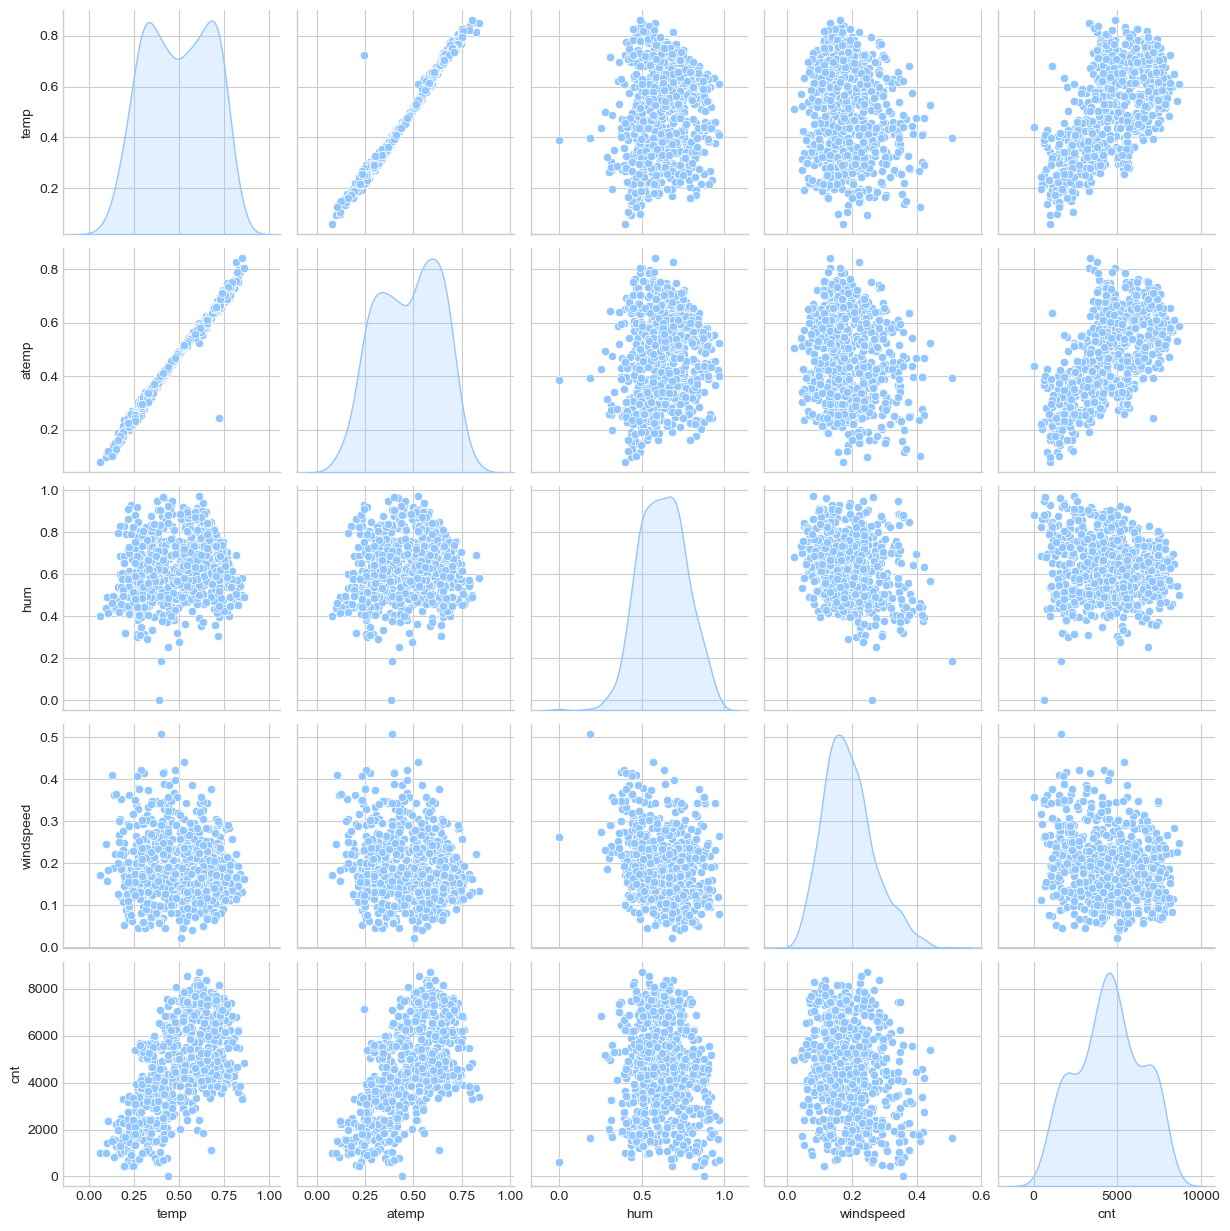

In [401]:
# A pair plot which consists of continious and discrete plots with all numerical variables
num_vars = df[['temp', 'atemp', 'hum', 'windspeed','cnt']]
plt.style.use('seaborn-whitegrid')
sns.pairplot(num_vars, diag_kind='kde')
plt.show()

**Inference** : From the above pair plot it can clearly seen that there is linear relationship between temp, atemp and cnt.

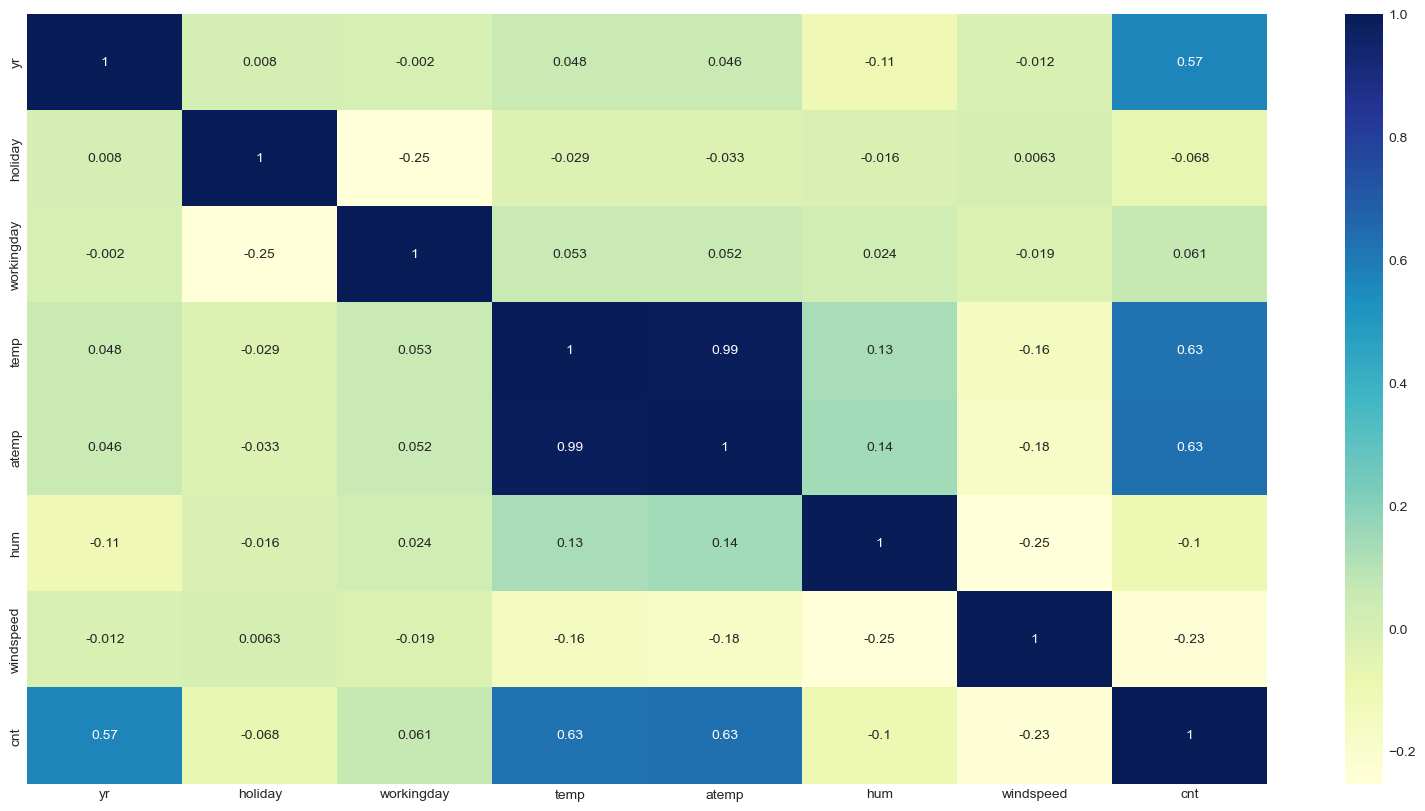

In [402]:
# using heatmap to check correlation

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Interpretation :**
- we can see that temp and atemp are highly correlated.
- Hence they voilate our assumption of multicollinearity and hence we will drop them while building model

## Univariate Analysis

### Categorical variable Analysis

##### Season vs Count

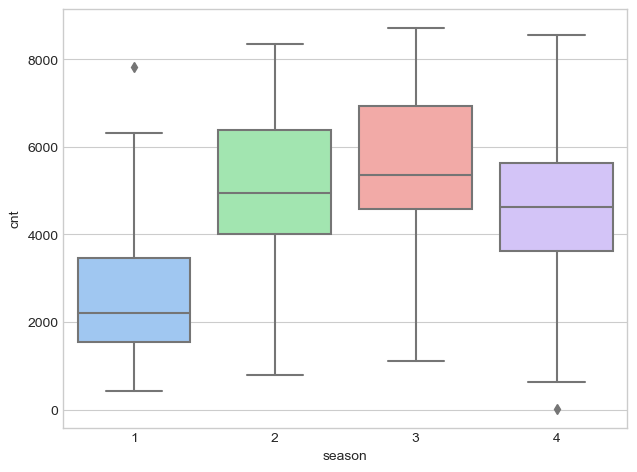

In [403]:
# Set the figure size
plt.figure(figsize=(16, 25))

# Create the subplot
plt.subplot(4, 2, 1)

# Plot the boxplot
sns.boxplot(x='season', y='cnt', data=df)

# Show the plot
plt.show()

**Interpreatation :** (1:spring, 2:summer, 3:fall 4:winter)
- One-third (more than 30%) of the bookings were done in fall season and the median lies around 5000, followed by Summer and Winter.
- Therefore, we can say that season can be explain good predictor of our label.

##### Holiday vs Count

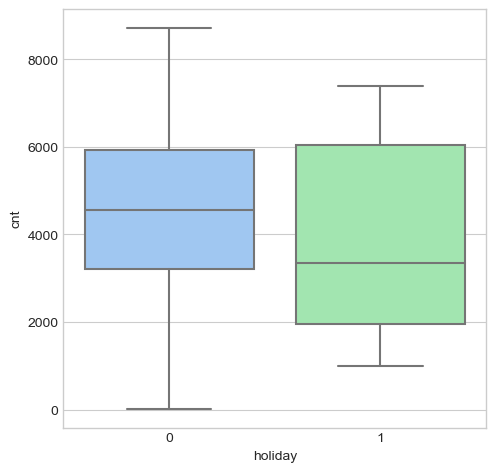

In [404]:
# Set the figure size
plt.figure(figsize=(12, 25))

# plot the boxplot
plt.subplot(4,2,3)
sns.boxplot(x='holiday', y= 'cnt', data= df)
plt.show()

In [405]:
df.holiday.value_counts()

0    710
1     21
Name: holiday, dtype: int64

**Interpretation :** 
- As we can see that maximum number of bookings are made on workingdays
- Thus, we can say that this feature is highly biased and will not be a good predictor of our label
- Therefore this feature can be dropped while model building

##### Year vs Count

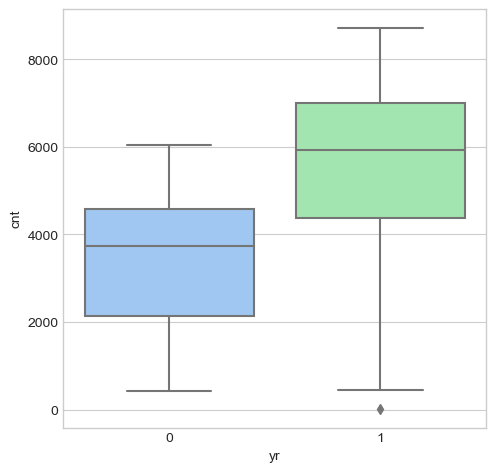

In [406]:
# Set the figure size
plt.figure(figsize=(12, 25))

# plot the boxplot
plt.subplot(4,2,3)
sns.boxplot(x='yr', y= 'cnt', data= df)
plt.show()

**Interpretation :**
- We can see that yr 1(2019) has almost twice as much as yr 1(2018) number of bookings
- Our data has only two years of data hence this can be important predictor our label

##### Months vs Count

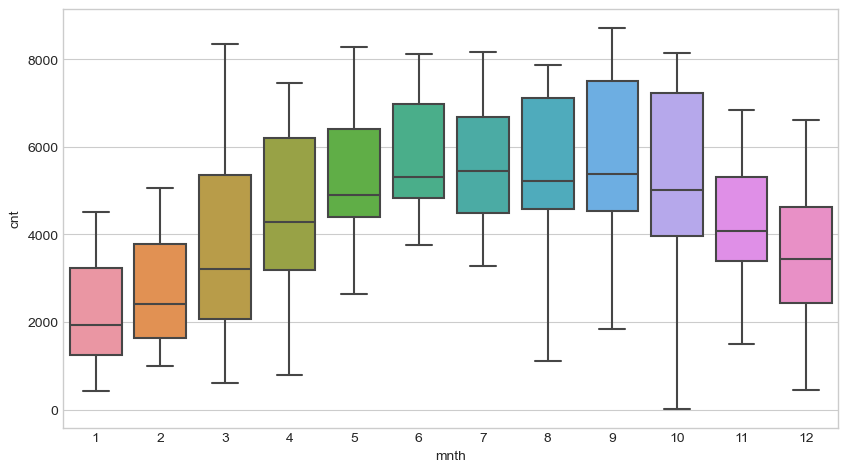

In [407]:
# Set the figure size
plt.figure(figsize=(22, 25))

# plot the boxplot
plt.subplot(4,2,3)
sns.boxplot(x='mnth', y= 'cnt', data= df)
plt.show()

**Interpretation :** (Jan - Dec)
- Distribution of months looks similar like a normal distribution, with months : 5-9 leading in number of bookings and crossing the median over around 4500-5000 number of bookings. 
- This also can serve as a good predictor for our analysis.

##### Weekdays vs Count

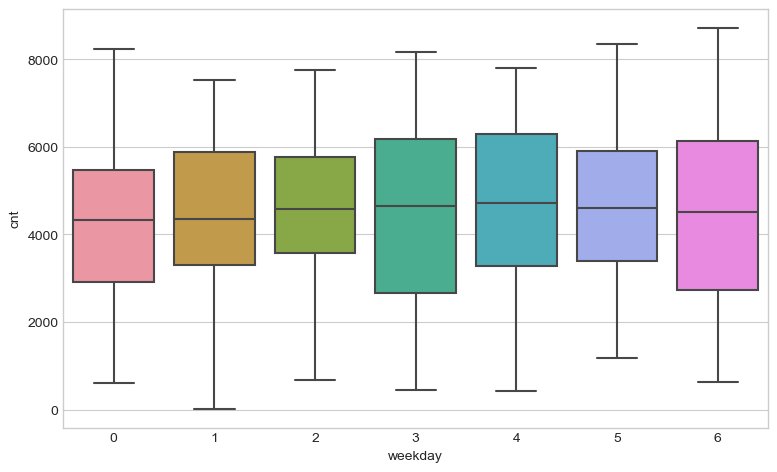

In [409]:
# Set the figure size
plt.figure(figsize=(20, 25))

# plot the boxplot
plt.subplot(4,2,3)
sns.boxplot(x='weekday', y= 'cnt', data= df)
plt.show()

**Interpreataion :** 
- There no such variance in the weekday data, no patterns can be obsserved here
- hence this feature won't explain much variance of our target feature and can be dropped while model building

##### Workingday vs Count

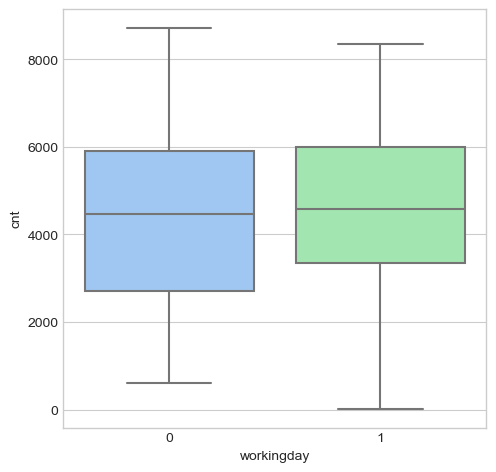

In [410]:
# Set the figure size
plt.figure(figsize=(12, 25))

# plot the boxplot
plt.subplot(4,2,3)
sns.boxplot(x='workingday', y= 'cnt', data= df)
plt.show()

In [411]:
# Check the count of each value in particular category
df.workingday.value_counts()

1    500
0    231
Name: workingday, dtype: int64

**Interpretation :** 

We can see that working_days(1) has twice as much number of bookings than Non_working_days(0)

##### Weather_Situation vs Count

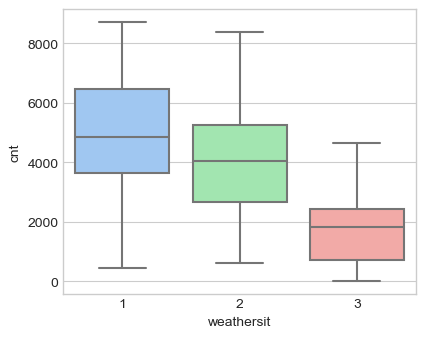

In [412]:
# Set the figure size
plt.figure(figsize=(10, 17))

# plot the boxplot
plt.subplot(4,2,3)
sns.boxplot(x='weathersit', y= 'cnt', data= df)
plt.show()

In [413]:
# Check the count of each value in particular category
df.weathersit.value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

**Interpretation :**
- We can see that maximum number of bookings are done when the weather is clear/partly cloudy with median of 5000 number of bookings
- followed by  misty/cloudy weather with a median of 4000 number of bookings in 2 yrs

# Bivariate Analysis

##### Avg Rental count per month

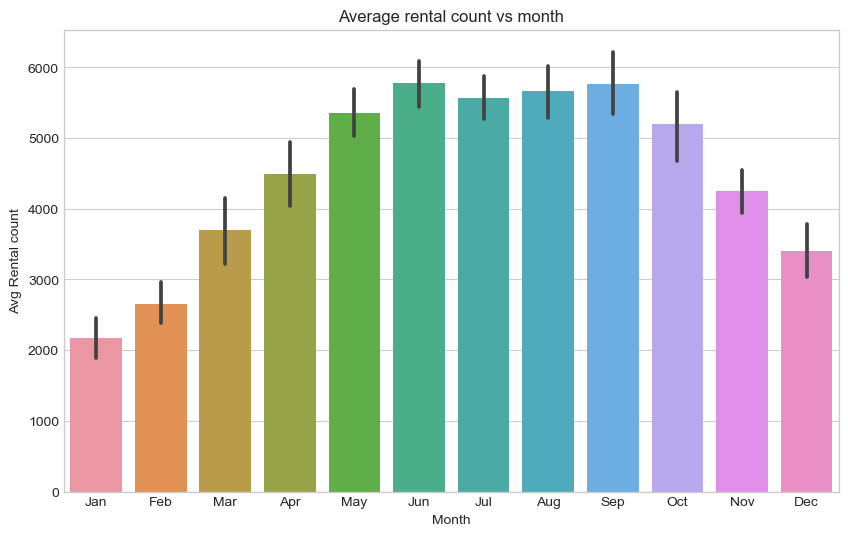

In [414]:
plt.figure(figsize=(10, 6))

# plot the bar plot
sns.barplot(x='mnth', y='cnt', data=df)

# Rename x-axis ticks
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add title and labels
plt.title('Average rental count vs month')
plt.xlabel('Month')
plt.ylabel('Avg Rental count')

plt.show()

**Interpretation :**

Highest rental counts are during June to Sept (fall season) and lowest during Dec-Feb (Winter season)

##### Avg Rental count per year

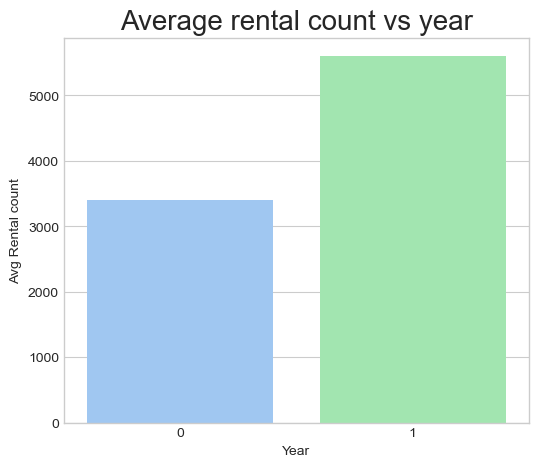

In [415]:
plt.figure(figsize=(6, 5))
plt.style.use('seaborn-pastel')

# yr vs rental count
dist2 = df.groupby(by='yr').cnt.mean()
sns.barplot(x=dist2.index, y=dist2.values)

# Add title and labels
plt.title('Average rental count vs year', fontdict={'fontsize': 20})
plt.xlabel('Year')
plt.ylabel('Avg Rental count')

plt.show()

**Inerpretation: **

Rental counts for year 1(2019) is approximately twice that of year 0(2018)

##### Avg rental counts per season

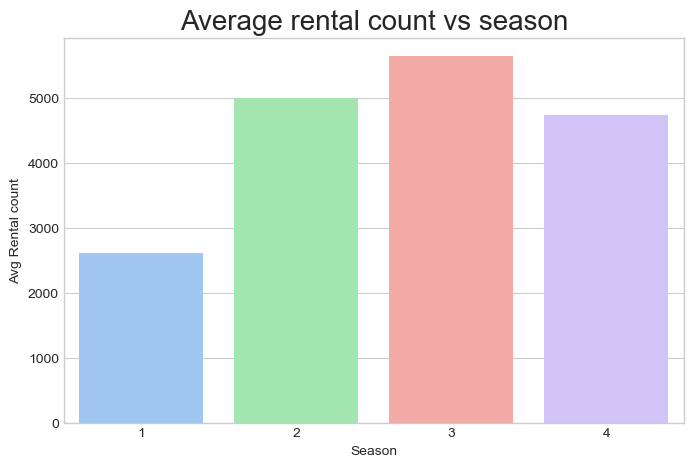

In [416]:
plt.figure(figsize=(8, 5))
plt.style.use('seaborn-pastel')

# season vs rental count
dist1 = df.groupby(by='season').cnt.mean()
sns.barplot(x=dist1.index, y=dist1.values)

# Add title and labels
plt.title('Average rental count vs season', fontdict={'fontsize': 20})
plt.xlabel('Season')
plt.ylabel('Avg Rental count')

plt.show()

**Inference :**

Highest rental counts are during fall season and lowest rental counts are during sprimg seasonl 

##### Avg rental count for each weather_situation

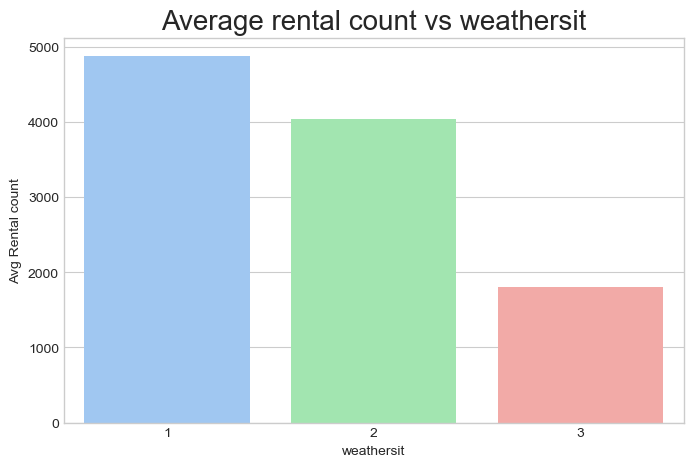

In [417]:
plt.figure(figsize=(8, 5))
plt.style.use('seaborn-pastel')

# weathersit vs rental count
dist2 = df.groupby(by='weathersit').cnt.mean()
sns.barplot(x=dist2.index, y=dist2.values)

# Add title and labels
plt.title('Average rental count vs weathersit', fontdict={'fontsize': 20})
plt.xlabel('weathersit')
plt.ylabel('Avg Rental count')

plt.show()

**Interpretation :**
    
Highest rental counts are during weather pattern clear/partly cloudy and lowest rental counts are during light snow/rain/storm

# Data Preprocessing

In [419]:
# Converting 0,1,... to their original category names
df['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace =True)
df['weathersit'].replace({1: 'Clear/Partly cloudy', 2: 'Mist/Cloudy', 3: 'Light-Snow/Rain/Storm'}, inplace =True)
df['mnth'].replace({1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 5: 'May', 6: 'June',7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace =True)
df['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'}, inplace = True)

After encoding the above features, this will give us better understanding that which category of that feature is a good predictor or not for our model

In [420]:
# check that the values of above columns are changed in their specific category names 
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,spring,0,Jan,0,Sunday,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,spring,0,Jan,0,Monday,1,Clear/Partly cloudy,0.196364,0.189405,0.437273,0.248309,1349
3,spring,0,Jan,0,Tuesday,1,Clear/Partly cloudy,0.200000,0.212122,0.590435,0.160296,1562
4,spring,0,Jan,0,Wednesday,1,Clear/Partly cloudy,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,spring,1,Dec,0,Thursday,1,Mist/Cloudy,0.254167,0.226642,0.652917,0.350133,2114
727,spring,1,Dec,0,Friday,1,Mist/Cloudy,0.253333,0.255046,0.590000,0.155471,3095
728,spring,1,Dec,0,Saturday,0,Mist/Cloudy,0.253333,0.242400,0.752917,0.124383,1341
729,spring,1,Dec,0,Sunday,0,Clear/Partly cloudy,0.255833,0.231700,0.483333,0.350754,1796


## One-hot encoding

In [421]:
# creating columns of each category for better understaning of each category
df =  pd.get_dummies(df, drop_first=True)

# check encoded dataframes summmary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                731 non-null    int64  
 1   holiday                           731 non-null    int64  
 2   workingday                        731 non-null    int64  
 3   temp                              731 non-null    float64
 4   atemp                             731 non-null    float64
 5   hum                               731 non-null    float64
 6   windspeed                         731 non-null    float64
 7   cnt                               731 non-null    int64  
 8   season_spring                     731 non-null    uint8  
 9   season_summer                     731 non-null    uint8  
 10  season_winter                     731 non-null    uint8  
 11  mnth_Aug                          731 non-null    uint8  
 12  mnth_Dec

In [423]:
# check the dimensions of the data after encoding the columns
df.shape

(731, 30)

In [424]:
# print the first five values of the dataframe after one-hot encoding the columns
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
0,0,0,0,0.344167,0.363625,0.805833,0.160446,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0.363478,0.353739,0.696087,0.248539,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0.196364,0.189405,0.437273,0.248309,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.200000,0.212122,0.590435,0.160296,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0.226957,0.229270,0.436957,0.186900,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [425]:
# check all the columns 
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light-Snow/Rain/Storm', 'weathersit_Mist/Cloudy'],
      dtype='object')

## Split data

In [428]:
# split features(X) and target(y) variable

# independent variable
X = df[['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light-Snow/Rain/Storm', 'weathersit_Mist/Cloudy']]

# dependent variable
y = df.cnt

### Train - Test split

##### Splitiing data in train and test data in 80:20 ratio
**train = 80%** , **test = 20%**

In [429]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [430]:
# dimensions of train and test data 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((584, 29), (147, 29), (584,), (147,))

#### Check the correlation among all variables (after adding dummies)

<Figure size 3000x2000 with 0 Axes>

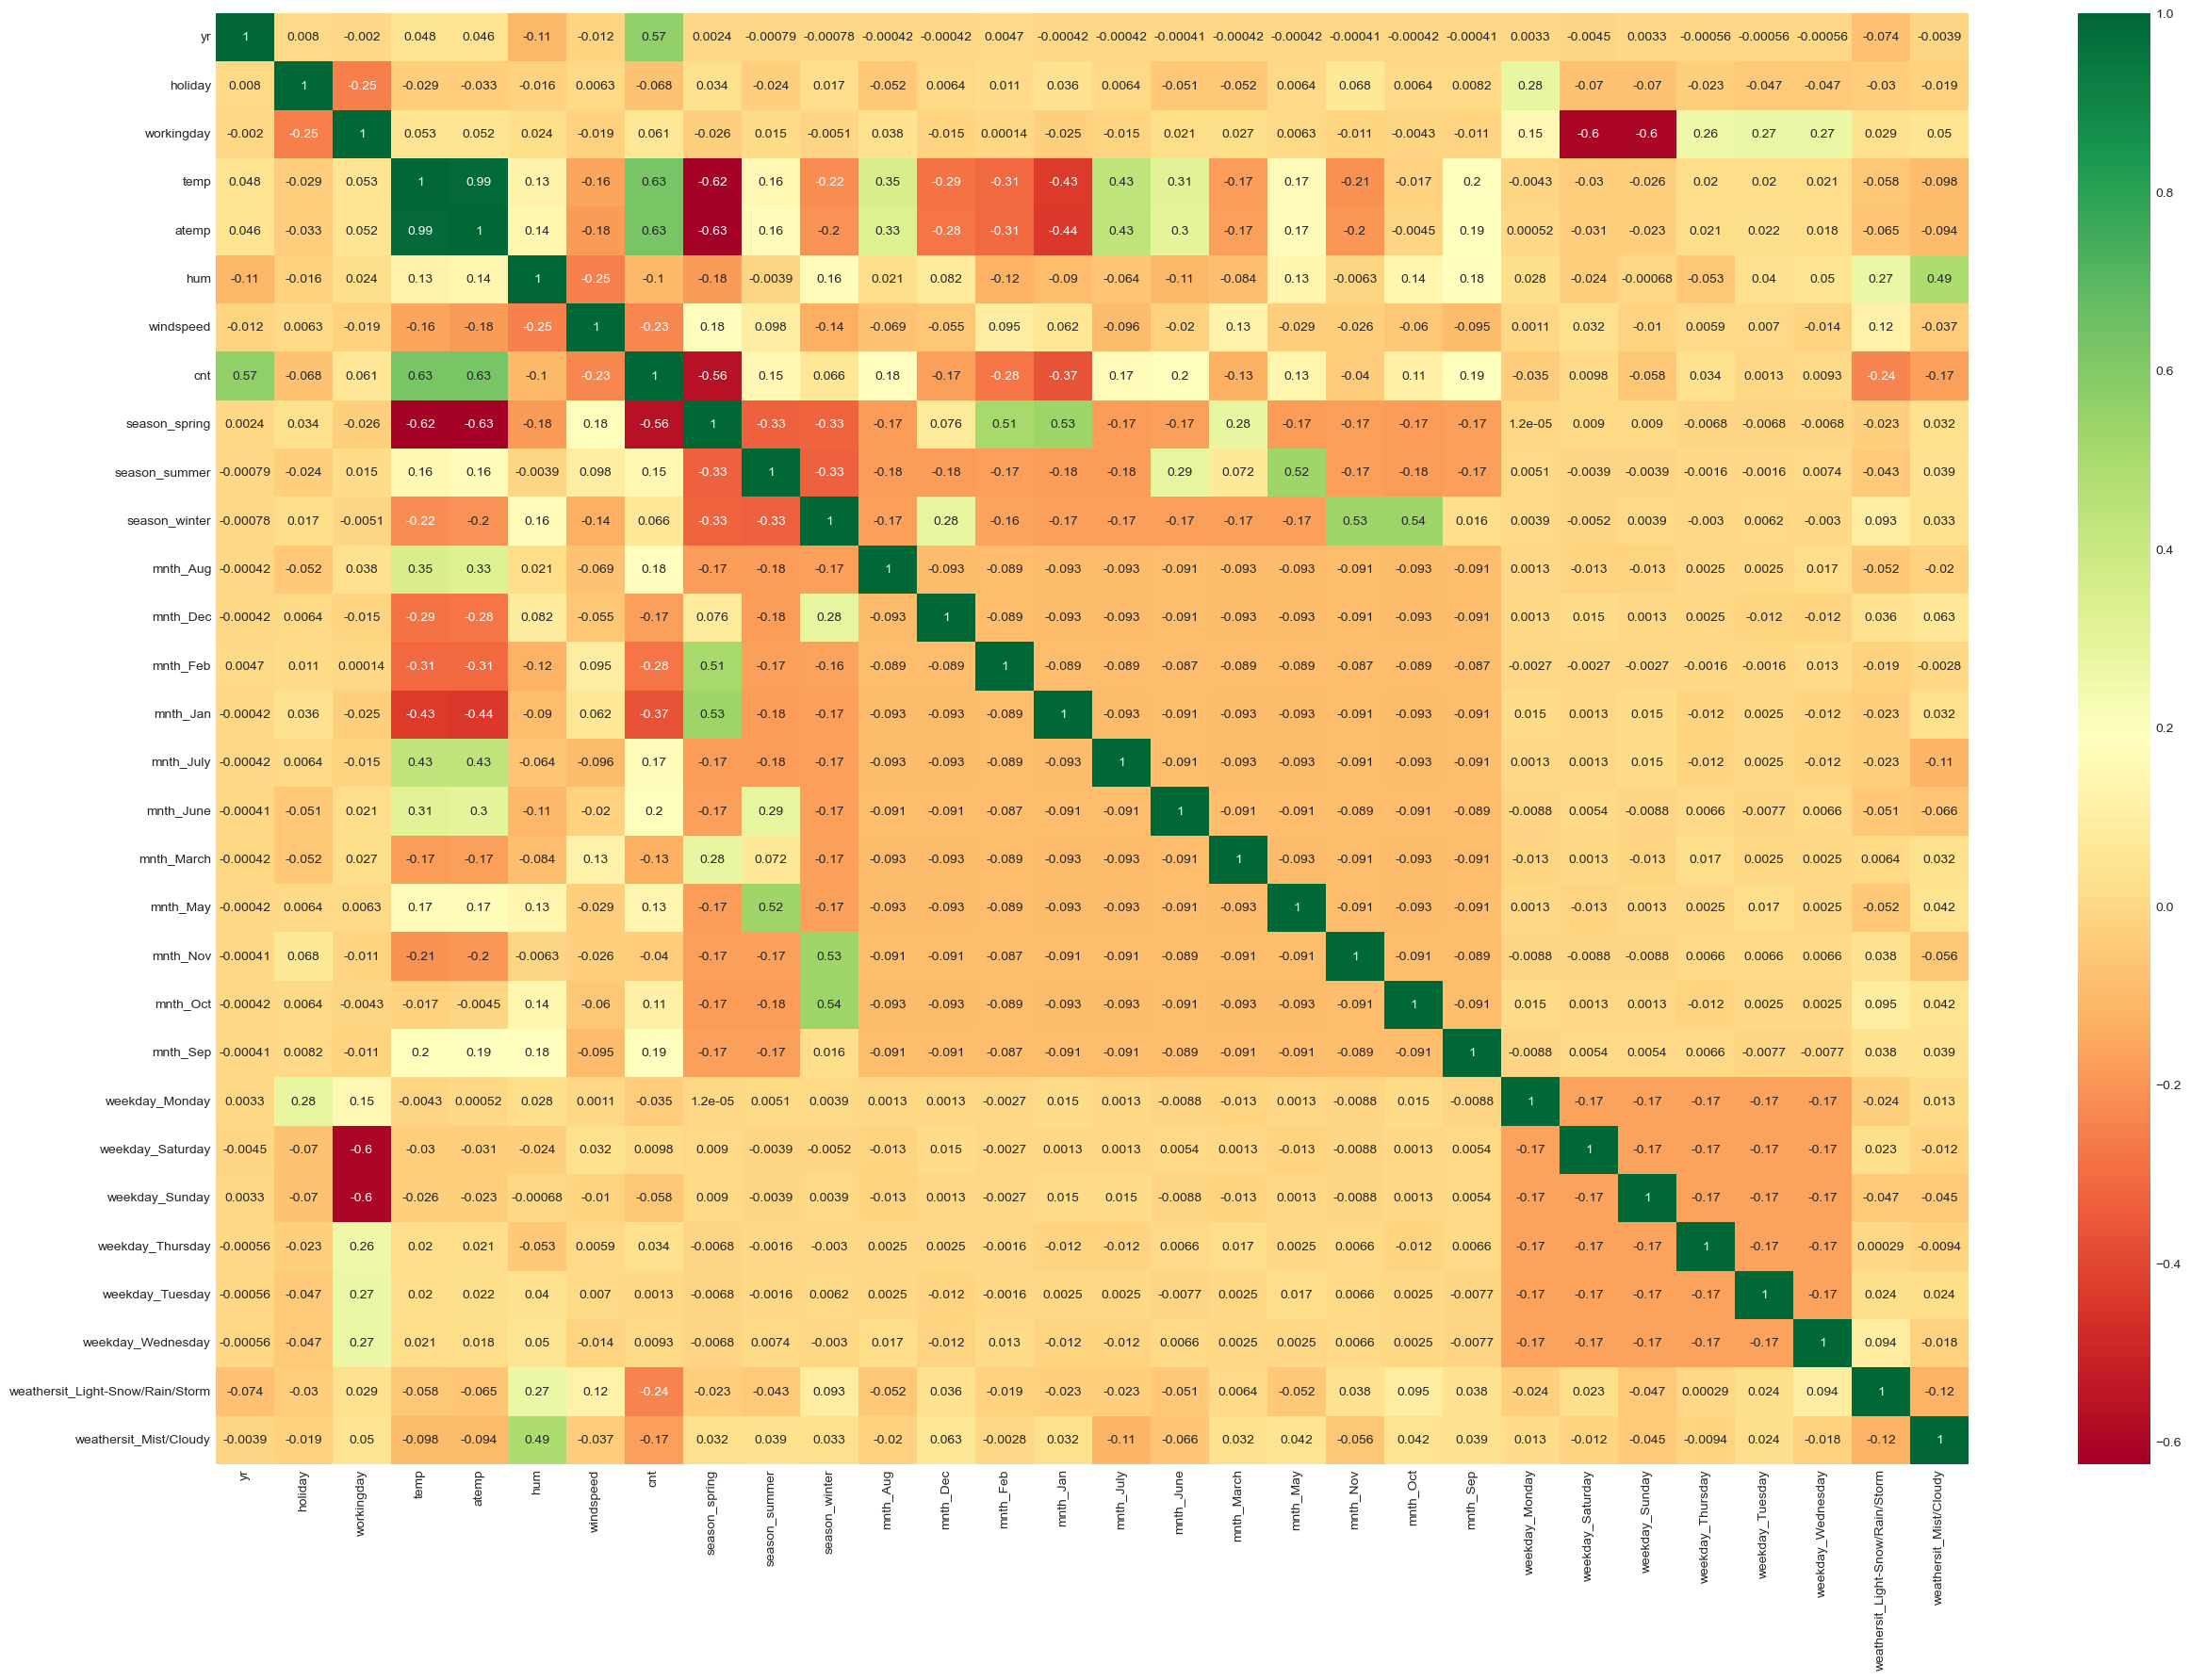

In [433]:
plt.figure(figsize = (30,20))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

**Inferences :**

Variables having a high collinearity with target variable 'cnt' are as follows:
- atemp (0.63)
- yr (0.57)
- spring (-0.56)

Variables having a high to moderate collinearity with each other :

- temp and atemp (0.99)

- hum and weathersit_Mist/Cloudy (0.49)

- season_winter and mnth_10 (0.54), mnth_11 (0.53)

- season_summer and mnth_4 (0.54), mnth_5 (0.54)

- atemp and mnth_7 (0.43)

- mnth_2 and season_spring (0.5)


# Feature Scaling

### min-max scaler
Min-max scaler is a normalization technique. We used mix-max scaler here because we have to rescale our data such that our mean  should be 0 and std dev should be 1, meaning our data should be in standard normal form.

In [435]:
scale =  MinMaxScaler()
num = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df[num] = scale.fit_transform(df[num])

In [436]:
# post rescaling descriptive stat summary
df[num].describe()

,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.543594,0.518864,0.645649,0.346536,0.515687
std,0.228091,0.213909,0.146457,0.159766,0.222873
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.346343,0.339674,0.534704,0.232045,0.360101
50%,0.547268,0.535113,0.644388,0.326928,0.520709
75%,0.743002,0.695083,0.750857,0.434622,0.682697
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Outlier treatment

We treat outlier because Linear regression is sensitive to outliers

#### IQR method

In [438]:
# obtain the first quartile
Q1 = df[num].quantile(0.25)

# obtain the third quartile
Q3 = df[num].quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

temp         0.396659
atemp        0.355408
hum          0.216153
windspeed    0.202577
cnt          0.322595
dtype: float64


In [441]:
# filter out the outlier values
# ~ : selects all rows which do not satisfy the condition
# any() : returns whether any element is True over the columns
# axis : "1" indicates columns should be altered (0 for 'index')
df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

##### Check the outlier through boxplot after treating them

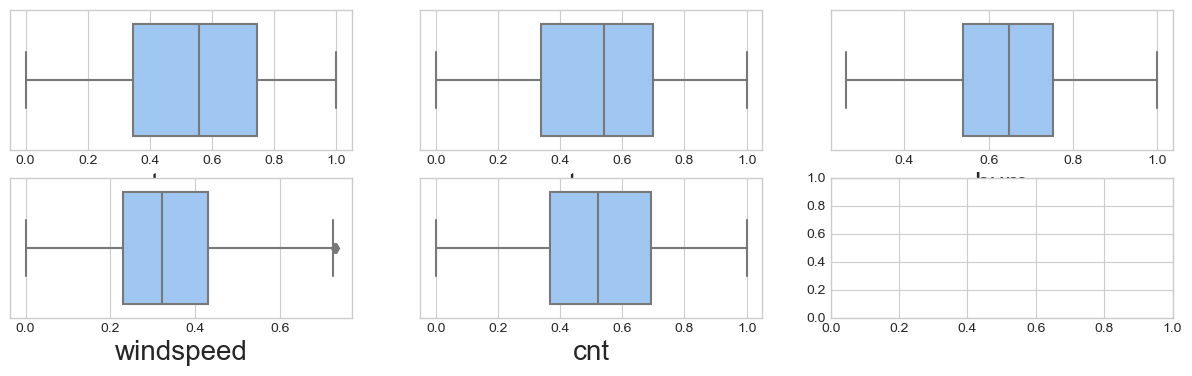

In [442]:
# consider the variables which has outliers
variables = ['temp','atemp','hum','windspeed','cnt']

# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 4))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: set the font size of the x-axis label
for variable, subplot in zip(df_iqr[variables], ax.flatten()):
    z = sns.boxplot(x=df_iqr[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 20)
    
plt.show()

**Inferene :**
    
We can see that almost all the outliers from data have been trimmed

# Linear Regression Model building

### Feature selection through RFE (Recursive Feature Elimination)

- We have around 28 columns (variables), excluding the target variable. Since it isn't easy to analyse all these predictors, will consider 15 variables to start with.
- we will select these 15 featuers through RFE

In [443]:
# Create an instance of the Linear Regression model.
lm = LinearRegression()

# Fit the LinearRegression model to the training data to learn the coefficients.
lm.fit(X_train, y_train)

# Recursive Feature Elimination (RFE) with the LinearRegression model as the estimator and select the top 15 features.
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit the RFE model to the training data to select the top 15 features based on their importance.
rfe = rfe.fit(X_train, y_train)

In [444]:
# combine=ing columns , rfe_support, rfe_ranking 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 7),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 4),
 ('mnth_July', True, 1),
 ('mnth_June', False, 15),
 ('mnth_March', True, 1),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 14),
 ('weathersit_Light-Snow/Rain/Storm', True, 1),
 ('weathersit_Mist/Cloudy', True, 1)]

In [445]:
# Create an empty DataFrame to store the results.
rfe_df = pd.DataFrame()

#Add a column called "Columns" to the DataFrame and assign it the values of the column names from the training data. 
rfe_df['Columns'] = X_train.columns

#  Add another column called "Support" to the DataFrame and assign it the values of the feature selection (True or False) obtained from RFE.
rfe_df['Support'] = rfe.support_

# Filter the DataFrame to keep only the rows where the "Support" column is True, indicating the selected features.
# True ones are 15 features that we get after RFE
rfe_df = rfe_df[rfe_df['Support']== True]

# Display the resulting DataFrame. 
rfe_df

,Columns,Support
0,yr,True
3,temp,True
4,atemp,True
5,hum,True
6,windspeed,True
7,season_spring,True
9,season_winter,True
11,mnth_Dec,True
14,mnth_July,True
16,mnth_March,True


These are the best 15 features we got from the model after RFE

In [446]:
# create a variable to store these 15 features  
best_cols = [i for i in rfe_df['Columns']]

# display first 5 rows of best_cols from X_train
X_train[best_cols].head()

,yr,temp,atemp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_July,mnth_March,mnth_Nov,mnth_Sep,weekday_Saturday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
682,1,0.343333,0.323225,0.662917,0.342046,0,1,0,0,0,1,0,0,0,1
250,0,0.633913,0.555361,0.939565,0.192748,0,0,0,0,0,0,1,0,1,0
336,0,0.299167,0.310604,0.612917,0.095783,0,1,1,0,0,0,0,1,0,0
260,0,0.507500,0.490537,0.695000,0.178483,0,0,0,0,0,0,1,0,0,0
543,1,0.697500,0.640792,0.360000,0.271775,0,0,0,0,0,0,0,0,0,0


In [447]:
# Check the dimensions of the best_cols
X_train[best_cols].shape

(584, 15)

In [450]:
# create a function for calculating VIF (variance inflation factor)

def vif(dataframe):
    # Create a new DataFrame to store the VIF values
    vif = pd.DataFrame()
    
    # add a column named feature in the data frame
    vif["Feature"] = dataframe.columns

    # Calculate VIF for each feature
    vif["VIF Value"] = [variance_inflation_factor(dataframe.values, i) for i in range(len(dataframe.columns))]

    # Sorting dataframe by VIF values
    vif = vif.sort_values(by="VIF Value", ascending=False).reset_index(drop=True)
    
    return vif

In [451]:
# Defining function for linear Regression 

def reg_ols(y_dataframe, X_dataframe):
    
    # Adding constant
    X_dataframe = sm.add_constant(X_dataframe)
    
    # Creating linear Regression model
    lm = sm.OLS(y_dataframe, X_dataframe).fit()
    
    # printing the summary of stat model
    print(lm.summary())

### LR model - 1

In [453]:
# Creating dataframe from the best_cols of X_train
X_train_1 = X_train[best_cols]

In [454]:
# Building Regression model
reg_ols(y_train, X_train_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     192.4
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          3.79e-211
Time:                        04:07:14   Log-Likelihood:                -4715.0
No. Observations:                 584   AIC:                             9462.
Df Residuals:                     568   BIC:                             9532.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**Inference :**
- P-value for 'atemp' variable is higher than our significance level i.e 0.05. This feature is considered insignificant by ols model
- Hence, we will drop this feature in next model

In [455]:
# get the vif for model-1
vif(X_train_1)

,Feature,VIF Value
0,atemp,516.658233
1,temp,484.310174
2,hum,27.287076
3,windspeed,6.058335
4,season_winter,2.692181
5,season_spring,2.666611
6,weathersit_Mist/Cloudy,2.280767
7,yr,2.116333
8,mnth_Nov,1.709873
9,mnth_July,1.447115


**Inference:** 

Here again the feature 'atemp' shows very high collinearity with other features, And hence we will drop it for the further analysis

### LR model - 2

Building the LR model after excluding 'atemp'(temprature)

In [456]:
# Creating dataframe
X_train_2 = X_train_1.drop(labels = ['atemp'], axis = 1)

# Building Regression model
reg_ols(y_train, X_train_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     205.8
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          5.70e-212
Time:                        04:07:17   Log-Likelihood:                -4715.9
No. Observations:                 584   AIC:                             9462.
Df Residuals:                     569   BIC:                             9527.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**Inferences:** 
    
Model-2 demonstrates that all the features have shown significance, which is a positive outcome.

In [457]:
# get the vif for model-2
vif(X_train_2)

,Feature,VIF Value
0,hum,25.633507
1,temp,19.611225
2,windspeed,6.039239
3,season_winter,2.652504
4,season_spring,2.646411
5,weathersit_Mist/Cloudy,2.263805
6,yr,2.115428
7,mnth_Nov,1.708520
8,mnth_July,1.446755
9,mnth_Dec,1.377505


**Inferences :** 

- The VIF reveals a high collinearity between the feature 'hum' (humidity) and other variables in the dataset.
- Therefore, we will exclude this feature in further analysis

### LR model - 3 

Building model excluding the feature 'hum'(Humidity)

In [458]:
# Creating dataframe
X_train_3 = X_train_2.drop(labels = ['hum'], axis = 1)

reg_ols(y_train, X_train_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     213.0
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          6.40e-209
Time:                        04:12:32   Log-Likelihood:                -4725.9
No. Observations:                 584   AIC:                             9480.
Df Residuals:                     570   BIC:                             9541.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**Inference :**

All the features are significant in this model

In [460]:
# get the vif for model-3
vif(X_train_3)

,Feature,VIF Value
0,temp,6.248196
1,windspeed,6.020765
2,season_winter,2.307931
3,yr,2.102157
4,season_spring,1.830671
5,mnth_Nov,1.684813
6,weathersit_Mist/Cloudy,1.554212
7,mnth_July,1.391570
8,mnth_Dec,1.334633
9,mnth_Sep,1.218400


**Inferences :**
    
- temp(temprature) and windspeed shows slightly higher VIF values. 
- This means these features have some interdependence between predictors
- The VIF is slightly higher hence can be ignored

# Linear Regression Assumptions

Five assumptions of Linear regression are :

1. **Normality:**  Error terms are normally distributed (around mean = 0) i.e, for any fixed value of X, Y is normally distributed.

2. **Linearity:** The relationship between X and the mean of Y is linear.

3. **No or little multicollinearity:**  Observations are independent of each other.

4. **Homoscedasticity:**  The variance of residual is the same for any value of X.

5. **No pattern or auto-correlation:**  Error terms(residuals) are independent of predicted value.

### 1. Error terms are normally distributed (around mean = 0)

In [462]:
lm= sm.OLS (y_train, X_train_3).fit() 
y_pred= lm.predict(X_train_3)  # predict value of traget variable using best model features(X_train_3)
residuals= y_train-y_pred  # difference bteween predicted and actualvalue

<Figure size 640x480 with 0 Axes>

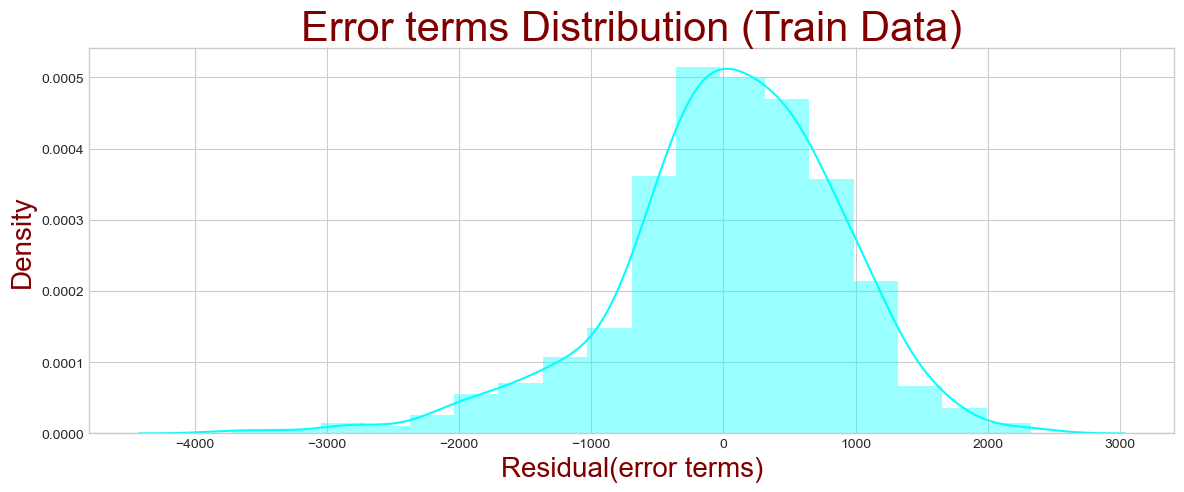

In [463]:
# plotting hist plot to analyse residuals

residual = y-y_pred  # Calculating the residuals by subtracting predicted values from actual values.
fig= plt.figure()  # Creating a new figure for the plot. 
plt.figure(figsize = (14,5))  #  Setting the figure size to 14 inches wide and 5 inches tall.
sns.distplot((residual), bins = 18, color='cyan') #  Plotting the distribution of error terms (residuals) using a histogram with 18 bins and cyan color.
plt.title('Error terms Distribution (Train Data)', fontsize=30,color='maroon') # Setting the title of the plot.
plt.xlabel('Residual(error terms)', fontsize= 20,color='maroon')  # Setting the x-axis label of the plot.
plt.ylabel('Density', fontsize= 20,color='maroon')  # Setting the y-axis label of the plot.
plt.show() # display the plot

**Inference :**
    
It can be clearly seen that residuals are normally distributed around mean zero 

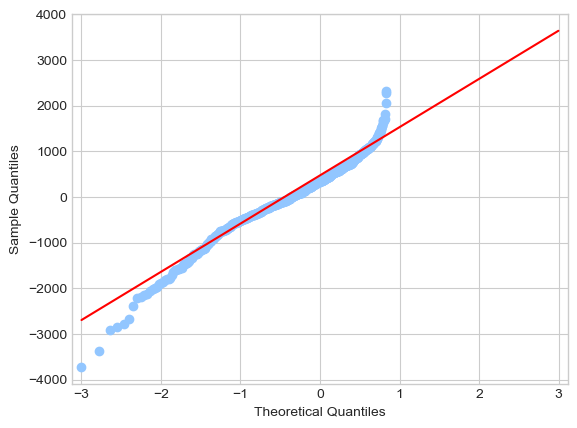

In [464]:
# Q-Q Plot : compare the residuals against normal distribution
sm.qqplot(residual, line='q')

**Inference :**
    
The q-q plot indicates that the residuals follow an approximate normal distribution.

### 2. A linear relationship exists between X and Y

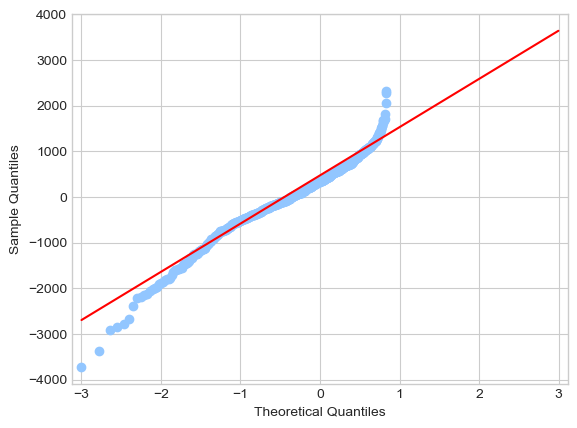

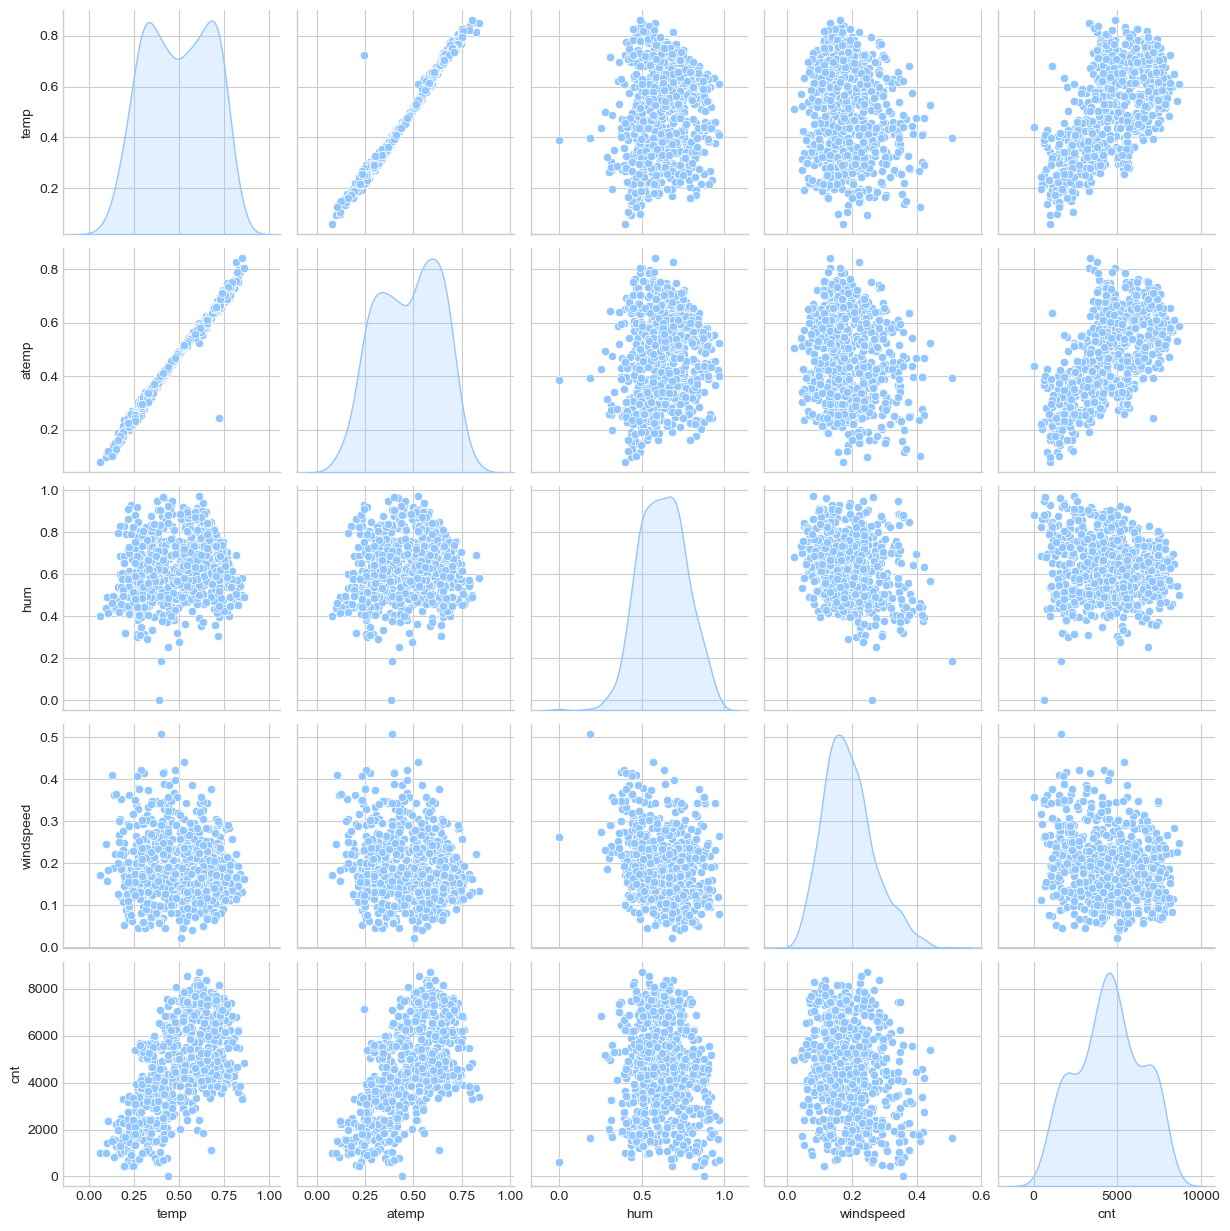

In [465]:
num_var = df[['atemp','temp','hum','windspeed','cnt']]
plt.style.use('seaborn-whitegrid')
sns.pairplot(num_vars, diag_kind='kde')
plt.show()

**Inference :** 
    
We can see that there is linear replationship between independent variable (temp, atemp) and dependent variable(cnt)

### 3. Multicollinearity : Independent features are not correlated with each other

In [466]:
# VIF(Variance Inflation factor) of our final model
vif(X_train_3)

,Feature,VIF Value
0,temp,6.248196
1,windspeed,6.020765
2,season_winter,2.307931
3,yr,2.102157
4,season_spring,1.830671
5,mnth_Nov,1.684813
6,weathersit_Mist/Cloudy,1.554212
7,mnth_July,1.391570
8,mnth_Dec,1.334633
9,mnth_Sep,1.218400


**Inference :**
    
There is not much multicollinearity between the predictor variables

### **4. Homoscedasticity :** variance of the error terms is constant across all levels of the predictor variables.

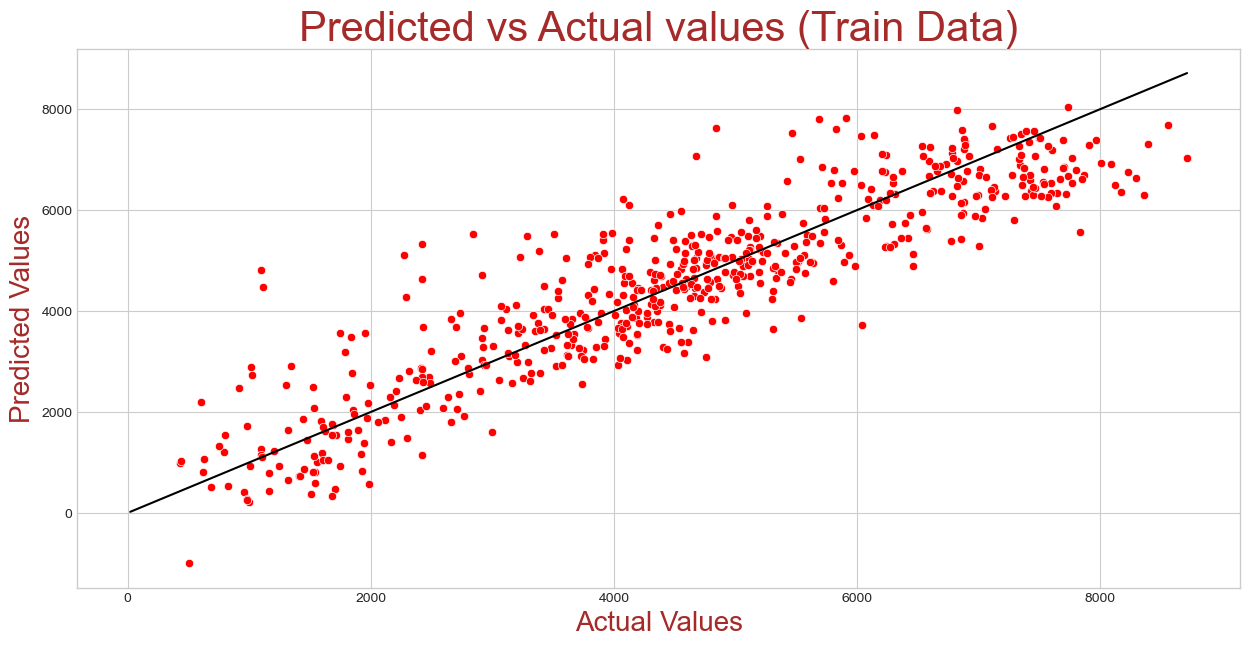

In [467]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x=y, y=y_pred, color='red')
plt.plot([min(y), max(y)], [min(y), max(y)], color='Black')  # Add a diagonal line for reference
plt.title('Predicted vs Actual values (Train Data)', fontsize=30, color='brown')
plt.xlabel("Actual Values", fontsize=20, color='brown')
plt.ylabel("Predicted Values", fontsize=20, color='brown')
plt.show()

**Inference :** 
    
- We can see that the residuals are equally distributed across the predictors
- Hence, there exists an equal variance of residuals and we can be sure that there isn't any ambiguity or presence of high or low concentrated regions.

### 5. Error terms (residuals) are independent of predicted value.

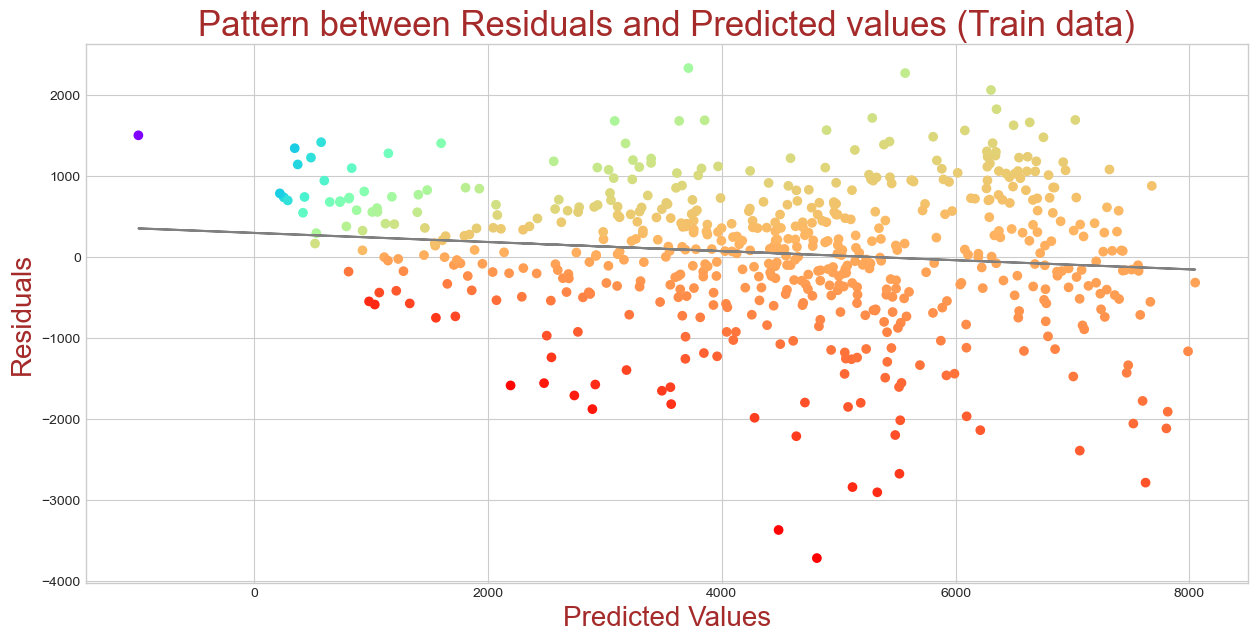

In [468]:
#test data
plt.figure(figsize = (15,7))

cmap=plt.cm.rainbow
#sns.regplot(x=y_pred, y=residual, color='orange')
x= y_pred
y=y_train - y_pred
plt.scatter(x, y, c= np.arctan2(x,y), cmap=cmap ,alpha = 1)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='grey')
plt.title ('Pattern between Residuals and Predicted values (Train data)' , fontsize=25, color= 'brown')
plt.xlabel("Predicted Values", fontsize=20, color= 'brown')
plt.ylabel("Residuals", fontsize=20, color= 'brown')
plt.show()


## Prediction on test data 

In [469]:
# picking all variables which are part of our final model (filter required variables)

col_final = X_train_3.columns 
x_test_new = X_test[col_final]  # create a variable for test_data and store these selected features in it
x_test_new

,yr,temp,windspeed,season_spring,season_winter,mnth_Dec,mnth_July,mnth_March,mnth_Nov,mnth_Sep,weekday_Saturday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
703,1,0.475833,0.174129,0,1,1,0,0,0,0,0,0,0
33,0,0.186957,0.277752,1,0,0,0,0,0,0,0,0,0
300,0,0.330833,0.229479,0,1,0,0,0,0,0,0,0,1
456,1,0.425833,0.172267,0,0,0,0,0,0,0,0,0,1
633,1,0.550000,0.236321,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0,0.329167,0.220775,1,0,0,0,1,0,0,1,0,0
192,0,0.794167,0.200254,0,0,0,1,0,0,0,0,0,0
328,0,0.375000,0.098896,0,1,0,0,0,1,0,0,0,0
165,0,0.626667,0.167912,0,0,0,0,0,0,0,0,0,0


In [470]:
# Add a constant variable to test dataset
x_test_new = X_test[X_train_3.columns]
x_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 703 to 135
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                147 non-null    int64  
 1   temp                              147 non-null    float64
 2   windspeed                         147 non-null    float64
 3   season_spring                     147 non-null    uint8  
 4   season_winter                     147 non-null    uint8  
 5   mnth_Dec                          147 non-null    uint8  
 6   mnth_July                         147 non-null    uint8  
 7   mnth_March                        147 non-null    uint8  
 8   mnth_Nov                          147 non-null    uint8  
 9   mnth_Sep                          147 non-null    uint8  
 10  weekday_Saturday                  147 non-null    uint8  
 11  weathersit_Light-Snow/Rain/Storm  147 non-null    uint8  
 12  weathe

In [471]:
# make predictions based on final model for test_data
y_test_pred = lm.predict(x_test_new)

### LR Assumption on test data 

### Residuals analysis

<Figure size 640x480 with 0 Axes>

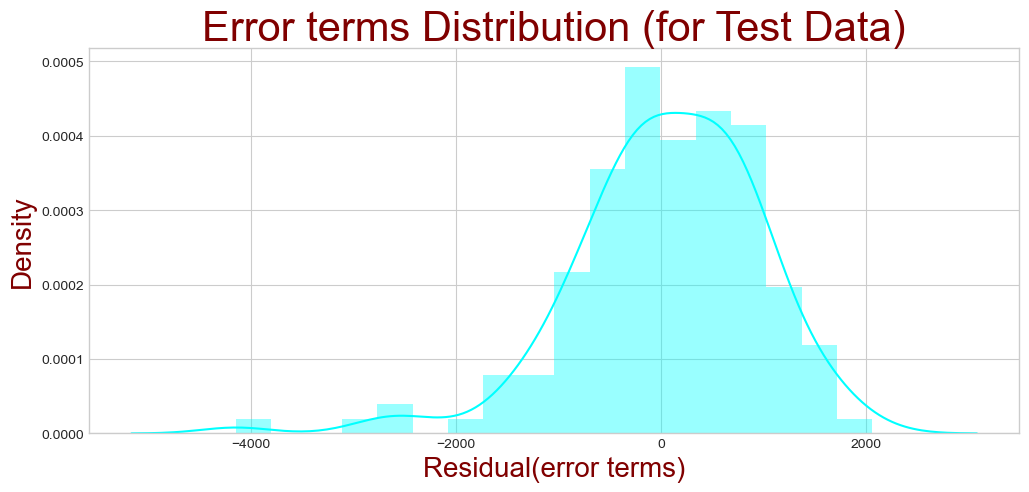

In [472]:
# plotting hist plot to analyse residuals

residual = y_test-y_test_pred

fig= plt.figure()
plt.figure(figsize = (12,5))
sns.distplot((residual), bins = 18, color='cyan')
plt.title('Error terms Distribution (for Test Data)', fontsize=30,color='maroon')
plt.xlabel('Residual(error terms)', fontsize= 20,color='maroon')
plt.ylabel('Density', fontsize= 20,color='maroon')
plt.show()

**Inference :** 
- The error approximately follows Normal distribution for the test data 
- this means the sample is iid and hence follows a Normal distribution with mean 0, sd 1

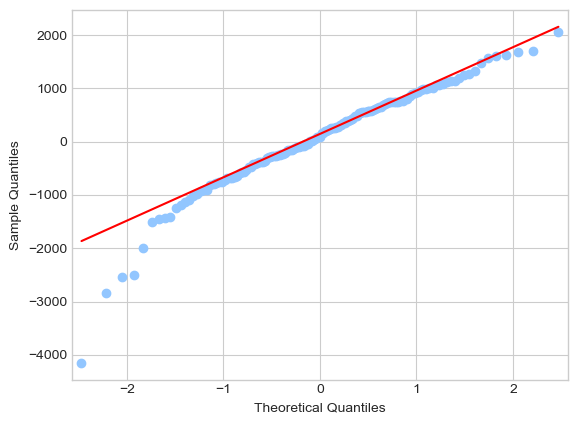

In [473]:
# Q-Q Plot : compare the residuals against normal distribution for Test data
residual = y_test-y_test_pred
sm.qqplot(residual, line='q')

### Homoscedasticity check

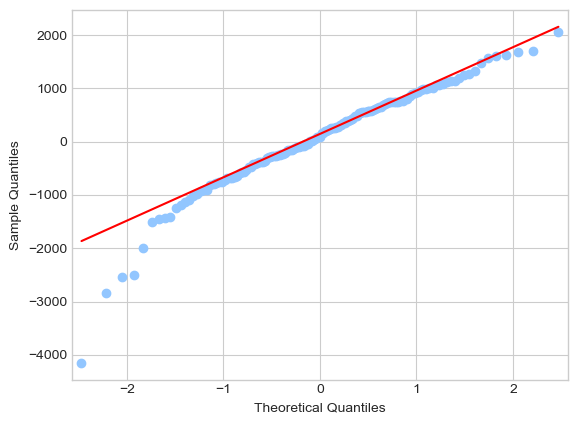

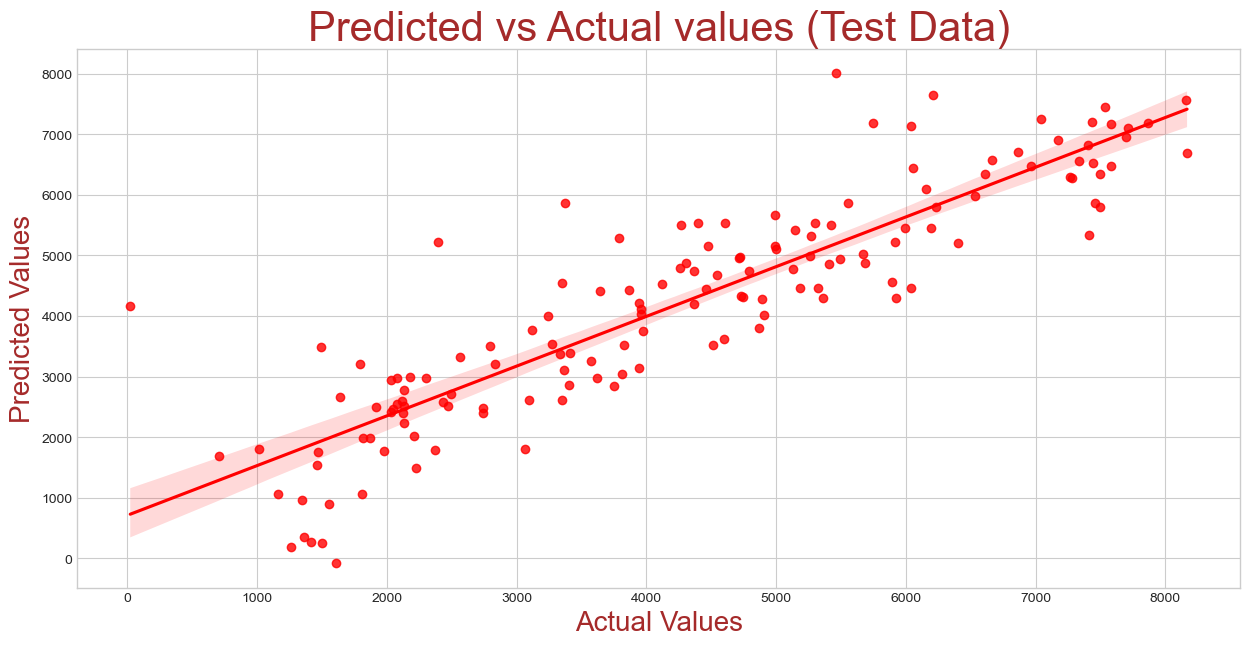

In [474]:
plt.figure(figsize = (15,7))
sns.regplot(x=y_test, y=y_test_pred, color='red')
plt.title ('Predicted vs Actual values (Test Data)' , fontsize=30, color='brown')
plt.xlabel("Actual Values", fontsize=20, color='brown')
plt.ylabel("Predicted Values", fontsize=20, color='brown')
plt.show()

**Inference :**

We can see that the errors are equally distributed across the predicted value

### Pattern check (between residuals and predicted values)

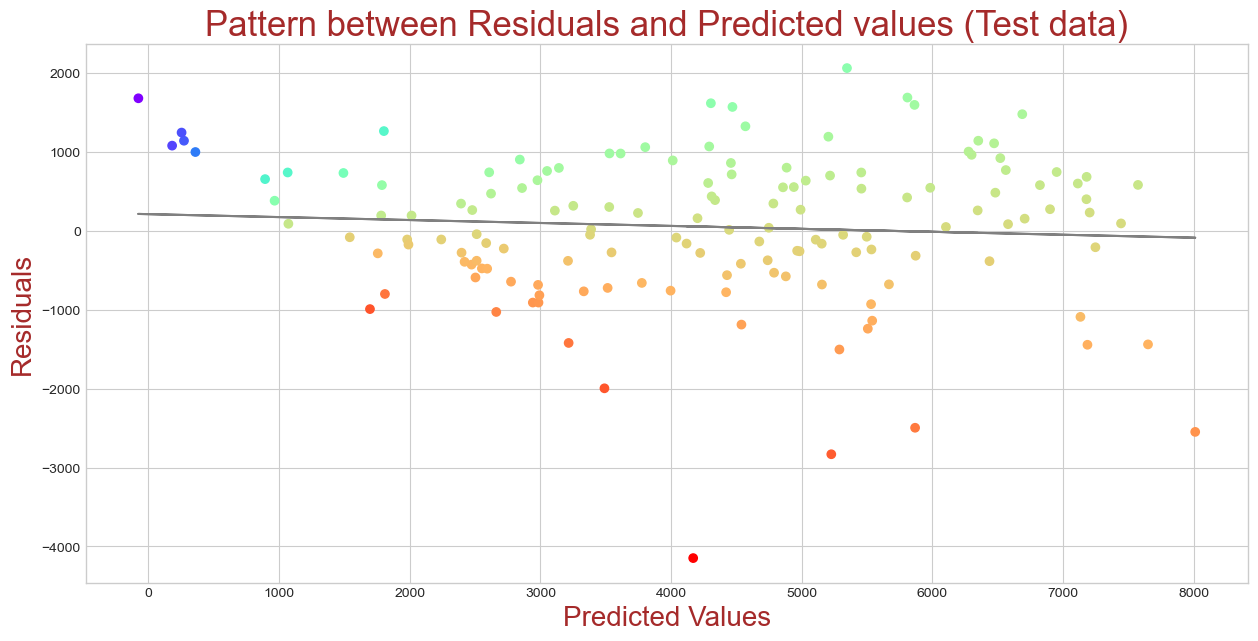

In [475]:
#test data
plt.figure(figsize = (15,7))

cmap=plt.cm.rainbow
#sns.regplot(x=y_pred, y=residual, color='orange')
x=y_test_pred
y=y_test - y_test_pred
plt.scatter(x, y, c= np.arctan2(x,y), cmap=cmap ,alpha = 1)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='grey')
plt.title ('Pattern between Residuals and Predicted values (Test data)' , fontsize=25, color= 'brown')
plt.xlabel("Predicted Values", fontsize=20, color= 'brown')
plt.ylabel("Residuals", fontsize=20, color= 'brown')
plt.show()

**Inference :**
- From the above plot we can clearly see that there are no such patterns in our model.
- Thus we can say that, There is no specific relation between the residuals and predicted values

# Model Evaluation on Test data 

### Model Performance check

<Figure size 640x480 with 0 Axes>

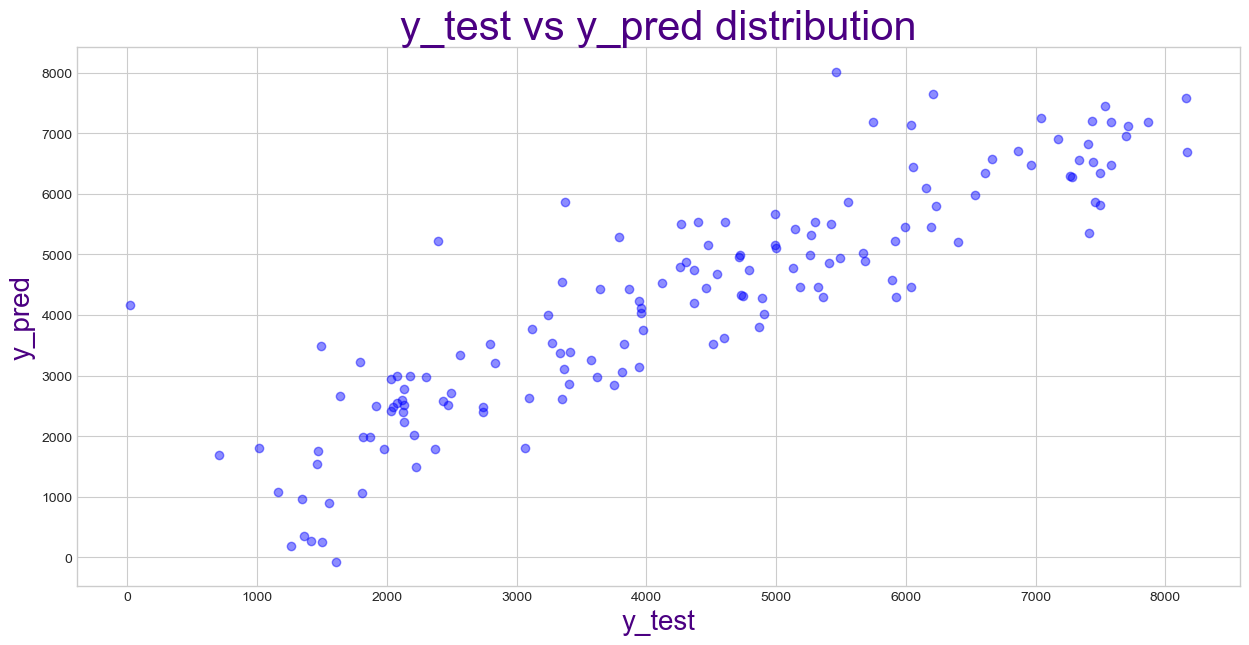

In [476]:
## Plot y_test and y_pred to see the accuracy of our final model
import matplotlib.cm as cm

fig= plt.figure()
c=cm.rainbow
plt.figure(figsize = (15,7))
plt.scatter(y_test, y_test_pred, alpha= 0.45, color = "blue")
plt.title ('y_test vs y_pred distribution' , fontsize=30, color='indigo')
plt.xlabel("y_test", fontsize=20, color='indigo')
plt.ylabel("y_pred", fontsize=20,  color='indigo')
plt.show()

# Performance Metrics

### R-squared comparison for Test

In [477]:
#calculating R-squared value for test model

from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7881411955332086

For the test data final model R_square is 0.79

### Adjusted R-squared

In [478]:
# evaluate the adjusted R squared for test model

r2 = 0.8068032076231737
x_row = X_test.shape[0]

#number of predictors
pred = X_test.shape[1]

#applying adjusted R squared formula
adj_r2 = 1-(1-r2)*(x_row-1)/(x_row-pred-1)
adj_r2

0.758916823187892

For the test data final model adjusted_R_square is 0.75

### R-squared comparison for Train

In [479]:
x_train_new = X_train[col_final]

# Make predictions on the training data
y_train_pred = lm.predict(x_train_new)

# Calculate R-squared for the training model
r2_train = r2_score(y_train, y_train_pred)

print("R-squared (Train):", r2_train)

R-squared (Train): 0.8057461398127245


For the Train data final model R_square is 0.80

### R-squared comparison for Train and Test

In [482]:
print("R-squared (Test) : ",r2_score(y_test, y_test_pred))
print("R-squared (Train) : ", r2_train)

R-squared (Test) :  0.7881411955332086
R-squared (Train) :  0.8057461398127245


**Interpretation :**
- Since the variation between train data predictions and test data predictions R_square value is less tha 5%, We can say that our model can be dependable to predict count for bike rentals

**Therefore, we can say that our final model is significant**

## Equation for Prediction 

As per the final model (Model-3), the best fit equation is :

**cnt**  =  2089.4746 + 2024.6114 (yr) + 4566.1381 (temp) - 2037.4608 (windspeed) - 1214.6070 (season_spring) 
    + 699.6092 (season_winter) - 491.4330 (mnth_Dec) - 631.0898  (mnth_July) + 497.2064 (mnth_March) 
    - 573.5113 (mnth_Nov) + 378.9571 (mnth_Sep) + 203.3957 (weekday_Saturday) 
    - 2187.0223 (weathersit_Light-Snow/Rain/Storm) - 706.0090 (weathersit_Mist/Cloudy)

## Conclusion :

**Best 5 features are:**


**yr (Year)**: It has a high coefficient and a significant p-value, indicating a strong positive relationship with the target variable, cnt.

**temp (Temperature)**: It has a high coefficient and a significant p-value, suggesting that temperature has a positive impact on bike rental count.

**weathersit_Mist/Cloudy**: It has a negative coefficient and a significant p-value, indicating that misty/cloudy weather conditions tend to decrease the bike rental count.

**season_winter**: It has a positive coefficient and a significant p-value, suggesting that the winter season has a positive influence on bike rentals compared to other seasons.

**weathersit_Light-Snow/Rain/Storm**: It has a negative coefficient and a significant p-value, indicating that the presence of light snow, rain, or storms negatively affects the bike rental count.






**Rental Bikes  must adopt a business plan with the following pointers in consideration :**


1. The rental count is likely to increase with an increase in temperature. So they should start marketing heavily in regions that are higher in termperature and humidity


2. Rental count is likely to decrease in regions with light rain/snow weather patterns. Hence the company should not invest heavily in such regions as it will be an insignificant investment.


3. Fall season encounters a heavy rise in rental count. Hence the company should focus on regions with heavy rainfall and specially during months July-October.


4. On the other hand, rental count is likely to decrease during Spring season (Feb-April). So company can offer discounts or other offers that may enhance the numbers during Spring.


5. Rental count is likely to high with every passing year. Hence company must plan accordingly in advance on supply of bikes per region.